In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input/mobile-uncleaned-data-set-scrapped-real-website'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mobile-uncleaned-data-set-scrapped-real-website/mobile.csv


## Data Cleaning

In [2]:
df = pd.read_csv('/kaggle/input/mobile-uncleaned-data-set-scrapped-real-website/mobile.csv')

In [3]:
df.head()

Name  Spec Score  rating  price  \
0  OPPO Reno 14 Pro 5G          89    4.65  41990   
1      OPPO Reno 14 5G          87    4.75  32990   
2           Poco F7 5G          83    4.75  31999   
3         Vivo X200 FE          89    4.65  49990   
4         OPPO K13x 5G          73    4.20  11999   

                                                 img       tag  \
0  https://cdn1.smartprix.com/rx-is822PXo3-w280-h...  UPCOMING   
1  https://cdn1.smartprix.com/rx-iRGgfcGDH-w280-h...  UPCOMING   
2  https://cdn1.smartprix.com/rx-icmgBU9Q2-w280-h...  LAUNCHED   
3  https://cdn1.smartprix.com/rx-iHI7IaQgQ-w280-h...  UPCOMING   
4  https://cdn1.smartprix.com/rx-iXUulomIY-w280-h...  LAUNCHED   

                                                 sim  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
1  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
2  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
3  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
4                 Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   

                                           processor  \
0      Dimensity 8450, Octa Core, 3.25 GHz Processor   
1      Dimensity 8350, Octa Core, 3.35 GHz Processor   
2   Snapdragon 8s Gen4, Octa Core, 3.2 GHz Processor   
3  Dimensity 9300 Plus, Octa Core, 3.25 GHz Proce...   
4       Dimensity 6300, Octa Core, 2.4 GHz Processor   

                     storage                                  battery  \
0  12 GB RAM, 256 GB inbuilt  6200 mAh Battery with 80W Fast Charging   
1   8 GB RAM, 256 GB inbuilt  6000 mAh Battery with 80W Fast Charging   
2  12 GB RAM, 256 GB inbuilt  7550 mAh Battery with 90W Fast Charging   
3  12 GB RAM, 256 GB inbuilt  6500 mAh Battery with 90W Fast Charging   
4   4 GB RAM, 128 GB inbuilt  6000 mAh Battery with 45W Fast Charging   

                                             display  \
0  6.83 inches, 1272 x 2800 px, 120 Hz Display wi...   
1  6.59 inches, 1256 x 2760 px, 120 Hz Display wi...   
2  6.83 inches, 1280 x 2772 px, 120 Hz Display wi...   
3  6.31 inches, 1216 x 2640 px, 120 Hz Display wi...   
4  6.67 inches, 720 x 1604 px, 120 Hz Display wit...   

                                              camera  \
0  50 MP + 50 MP + 50 MP Triple Rear & 50 MP Fron...   
1  50 MP + 50 MP + 8 MP Triple Rear & 50 MP Front...   
2        50 MP + 8 MP Dual Rear & 20 MP Front Camera   
3  50 MP + 50 MP + 8 MP Triple Rear & 50 MP Front...   
4         50 MP + 2 MP Dual Rear & 8 MP Front Camera   

                     memoryExternal      version           fm  
0                               NaN  Android v15  No FM Radio  
1                               NaN  Android v15  No FM Radio  
2         Memory Card Not Supported  Android v15          NaN  
3         Memory Card Not Supported  Android v15          NaN  
4  Memory Card Supported, upto 2 TB  Android v15          NaN

In [4]:
df.isnull().sum()

Name                0
Spec Score          0
rating              0
price               0
img                 0
tag                 0
sim                 0
processor          26
storage            20
battery             6
display             1
camera             11
memoryExternal    351
version            48
fm                725
dtype: int64

In [5]:
df.describe()

Spec Score       rating          price
count  1019.000000  1019.000000    1019.000000
mean     78.513248     4.377380   35006.714426
std      12.754081     0.234293   40671.714570
min       7.000000     3.450000      99.000000
25%      75.000000     4.150000   13999.000000
50%      81.000000     4.400000   23498.000000
75%      85.000000     4.600000   39990.000000
max      96.000000     4.750000  489990.000000

In [6]:
q1 = np.percentile(df['Spec Score'], 25)
q3 = np.percentile(df['Spec Score'], 75)
iqr = q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_list = [x for x in df['Spec Score'] if x < lower_bound or x > upper_bound]
print(f"\nOutliers (IQR method - List):\n{outliers_list}")


Outliers (IQR method - List):
[36, 29, 23, 58, 7, 9, 24, 55, 20, 32, 14, 59, 22, 56, 11, 57, 33, 16, 15, 21, 22, 20, 51, 48, 52, 16, 17, 13, 34, 55, 17, 30, 14, 13, 10, 16, 56, 47, 18, 12, 17, 15]


In [7]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print(numeric_cols)

['Spec Score', 'rating', 'price']


In [8]:
num_plots = len(numeric_cols)
num_cols = 3
num_rows = (num_plots+num_cols-1)

plt.figure(figsize=(num_rows*4, num_cols *10))
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Outliers {col}')
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [9]:
df[df['Spec Score'].isin(outliers_list)]

Name  Spec Score  rating  price  \
327                 Nokia 2780 Flip          36    4.25   4990   
484               Namotel Achhe Din          29    4.00     99   
507                Jio Bharat J1 4G          23    4.35   1799   
538                   Lava Shark 5G          58    4.15   7999   
540                BlackZone Crysto           7    4.10   1042   
542              Motorola Moto A200           9    4.05   1148   
562         Jio JioPhone Prima 2 4G          24    4.35   2799   
565                  Tecno POP 9 4G          55    4.50   5523   
578               Nokia 235 4G 2024          20    4.10   3569   
604               Nokia 2720 V Flip          32    4.25   6199   
606               Samsung Metro 313          14    4.50    998   
615                   itel City 100          59    4.55   7799   
630                Jio Bharat V4 4G          22    4.40    789   
641                     OPPO A3x 4G          56    4.15   7505   
681   Samsung Guru Music 2 Dual Sim          11    4.50    947   
685                    Lava Bold N1          57    4.45   5999   
691                     iKall I7 4G          33    4.35   1222   
701          Nokia 150 Music (2025)          16    4.00   2399   
734                   Jio Bharat B2          15    4.65   1399   
763           Jio Bharat K1 Karbonn          21    4.40    699   
764                   Jio Bharat V2          22    4.50    939   
776                 Nokia 2660 Flip          20    4.25   4399   
795                        itel S16          51    4.55   5990   
800                     Jio Phone 3          48    4.15   4499   
801                     Bluefox NX1          52    4.30   6999   
804                 BlackZone DT 4G          16    4.05   1935   
806                  Gamma Shine 4G          17    4.00   1646   
820                    Lava A5 2025          13    4.45   1192   
824               Snexian Bold T240          34    4.50   4399   
830        Lava O3 (3GB RAM + 64GB)          55    4.65   5799   
841               Nokia 110 4G 2024          17    4.05   2299   
869                   Light Phone 2          30    4.05  24990   
902                     itel it5330          14    4.45   1349   
914            Nokia 130 Music 2023          13    4.20   1849   
919         Nokia 105 Dual Sim 2023          10    4.75   1249   
926                    Nokia 106 4G          16    4.20   2057   
964                    itel S16 Pro          56    4.55   6990   
965                        itel P36          47    4.65   6490   
966                    Nokia 225 4G          18    4.35   2649   
994             Lava Gem Power 2025          12    4.10   1599   
1002                 Lava Action 4G          17    4.45   1774   
1008           HMD 130 Music (2025)          15    4.55   1803   

                                                    img       tag  \
327   https://cdn1.smartprix.com/rx-iQaYZqnQU-w280-h...  UPCOMING   
484   https://cdn1.smartprix.com/rx-iZhKdbLfo-w280-h...  UPCOMING   
507   https://cdn1.smartprix.com/rx-izjyzYtOX-w280-h...  LAUNCHED   
538   https://cdn1.smartprix.com/rx-imcz8CJdN-w280-h...  LAUNCHED   
540   https://cdn1.smartprix.com/rx-iiKUJPl6y-w280-h...  LAUNCHED   
542   https://cdn1.smartprix.com/rx-i9YLxe5k6-w280-h...  LAUNCHED   
562   https://cdn1.smartprix.com/rx-iJj5yRFFd-w280-h...  LAUNCHED   
565   https://cdn1.smartprix.com/rx-ijgDd1Q30-w280-h...  LAUNCHED   
578   https://cdn1.smartprix.com/rx-iNbOg55Wf-w280-h...  LAUNCHED   
604   https://cdn1.smartprix.com/rx-iulWfrmNi-w280-h...  UPCOMING   
606   https://cdn1.smartprix.com/rx-i9QIzvAUP-w280-h...  LAUNCHED   
615   https://cdn1.smartprix.com/rx-iW68YV2MY-w280-h...  UPCOMING   
630   https://cdn1.smartprix.com/rx-ipZL0B8OX-w280-h...  LAUNCHED   
641   https://cdn1.smartprix.com/rx-i04XfSeVK-w280-h...  LAUNCHED   
681   https://cdn1.smartprix.com/rx-iprrtYYqo-w280-h...  LAUNCHED   
685   https://cdn1.smartprix.com/rx-i4I4btWfd-w280-h...  LAUNCHED   
691   https://cdn1.

In [10]:
print(f'Upper Bound: {upper_bound}')
print(f'Lower Bound: {lower_bound}')
print(f'IQR: {iqr}')
print(f'Quartile 1: {q1}')
print(f'Quartile 3: {q3}')

Upper Bound: 100.0
Lower Bound: 60.0
IQR: 10.0
Quartile 1: 75.0
Quartile 3: 85.0


In [11]:
df['Spec Score'] = np.where(df['Spec Score'] < lower_bound, lower_bound, df['Spec Score'])

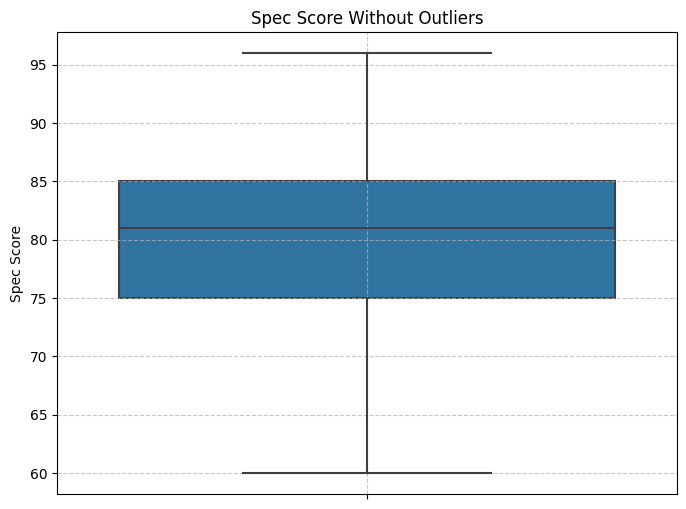

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Spec Score'])
plt.title('Spec Score Without Outliers')
plt.ylabel('Spec Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [13]:
df.isnull().sum()

Name                0
Spec Score          0
rating              0
price               0
img                 0
tag                 0
sim                 0
processor          26
storage            20
battery             6
display             1
camera             11
memoryExternal    351
version            48
fm                725
dtype: int64

In [14]:
df.drop(columns=['fm'], inplace=True)

In [15]:
df['storage'] = df['storage'].fillna('Unknown')
df['processor'] = df['processor'].fillna('Unknown')
df['memoryExternal'] = df['memoryExternal'].fillna('Unknown')
df['battery'] = df['battery'].fillna('Unknown') 
df['display'] = df['display'].fillna('Unknown')
df['camera'] = df['camera'].fillna('Unknown')
df['version'] = df['version'].fillna('Unknown') 

In [16]:
df.isnull().sum()

Name              0
Spec Score        0
rating            0
price             0
img               0
tag               0
sim               0
processor         0
storage           0
battery           0
display           0
camera            0
memoryExternal    0
version           0
dtype: int64

## Exploratory Data Analysis

Since we're gonna do a prediction model, let's take a look for the correlation between each variable

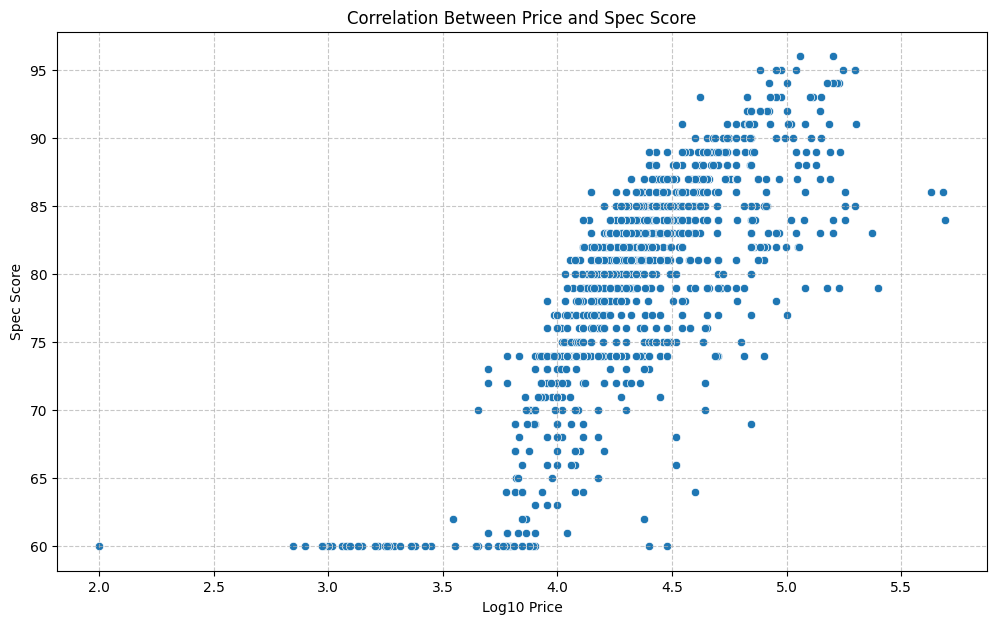

In [17]:
plt.figure(figsize=(12,7))
sns.scatterplot(df, x=np.log10(df['price']+1), y='Spec Score')
plt.title('Correlation Between Price and Spec Score')
plt.xlabel('Log10 Price')
plt.ylabel('Spec Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

We can observe from the following picture that there is a positive and generally linear relationship between Spec Score and Price.  In order to reduce the accumulation of the lower data and make it appear clear and instructive, I also perform a logarithmic modification. The top-left "ribbon" patterns indicate that a higher spec-score is always associated with a higher price.  Additionally, some pricing clusters with more constrained spec score varieties indicate distinct market sectors (e.g., entry-level, mid-range, and high-end).  These dots on the bottom left provide confirmation of the detected outliers, indicating that the product is being offered with fewer specifications, potentially resulting in a lower price.

In [18]:
top_n_processors = df['processor'].value_counts().head(10)
plt.figure(figsize=(12,7))
sns.barplot(x=top_n_processors.values, y=top_n_processors.index, palette='viridis')
plt.title('Distribution of Top 10 Processor Types')
plt.xlabel('Number of Phone')
plt.ylabel('Processor Type')
plt.show()

In [19]:
tag_counts = df['tag'].value_counts()
plt.figure(figsize=(12,7))
sns.barplot(data=df, x=tag_counts.index, y=tag_counts.values)
plt.title('Tag Count')
plt.xlabel('Tag')
plt.ylabel('Number of Tag')
plt.show()

# Modelling

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [21]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['Spec Score'] = pd.to_numeric(df['Spec Score'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [22]:
threshold_count = 5
processor_counts = df['processor'].value_counts()
rare_processors = processor_counts[processor_counts < threshold_count].index.tolist()
df_processed = df.copy() # Selalu bagus untuk bekerja di copy DataFrame
df_processed['processor_grouped'] = df_processed['processor'].replace(rare_processors, 'Other / Less Common')

In [23]:
df_processed.head()

Name  Spec Score  rating  price  \
0  OPPO Reno 14 Pro 5G        89.0    4.65  41990   
1      OPPO Reno 14 5G        87.0    4.75  32990   
2           Poco F7 5G        83.0    4.75  31999   
3         Vivo X200 FE        89.0    4.65  49990   
4         OPPO K13x 5G        73.0    4.20  11999   

                                                 img       tag  \
0  https://cdn1.smartprix.com/rx-is822PXo3-w280-h...  UPCOMING   
1  https://cdn1.smartprix.com/rx-iRGgfcGDH-w280-h...  UPCOMING   
2  https://cdn1.smartprix.com/rx-icmgBU9Q2-w280-h...  LAUNCHED   
3  https://cdn1.smartprix.com/rx-iHI7IaQgQ-w280-h...  UPCOMING   
4  https://cdn1.smartprix.com/rx-iXUulomIY-w280-h...  LAUNCHED   

                                                 sim  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
1  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
2  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
3  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
4                 Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   

                                           processor  \
0      Dimensity 8450, Octa Core, 3.25 GHz Processor   
1      Dimensity 8350, Octa Core, 3.35 GHz Processor   
2   Snapdragon 8s Gen4, Octa Core, 3.2 GHz Processor   
3  Dimensity 9300 Plus, Octa Core, 3.25 GHz Proce...   
4       Dimensity 6300, Octa Core, 2.4 GHz Processor   

                     storage                                  battery  \
0  12 GB RAM, 256 GB inbuilt  6200 mAh Battery with 80W Fast Charging   
1   8 GB RAM, 256 GB inbuilt  6000 mAh Battery with 80W Fast Charging   
2  12 GB RAM, 256 GB inbuilt  7550 mAh Battery with 90W Fast Charging   
3  12 GB RAM, 256 GB inbuilt  6500 mAh Battery with 90W Fast Charging   
4   4 GB RAM, 128 GB inbuilt  6000 mAh Battery with 45W Fast Charging   

                                             display  \
0  6.83 inches, 1272 x 2800 px, 120 Hz Display wi...   
1  6.59 inches, 1256 x 2760 px, 120 Hz Display wi...   
2  6.83 inches, 1280 x 2772 px, 120 Hz Display wi...   
3  6.31 inches, 1216 x 2640 px, 120 Hz Display wi...   
4  6.67 inches, 720 x 1604 px, 120 Hz Display wit...   

                                              camera  \
0  50 MP + 50 MP + 50 MP Triple Rear & 50 MP Fron...   
1  50 MP + 50 MP + 8 MP Triple Rear & 50 MP Front...   
2        50 MP + 8 MP Dual Rear & 20 MP Front Camera   
3  50 MP + 50 MP + 8 MP Triple Rear & 50 MP Front...   
4         50 MP + 2 MP Dual Rear & 8 MP Front Camera   

                     memoryExternal      version  \
0                           Unknown  Android v15   
1                           Unknown  Android v15   
2         Memory Card Not Supported  Android v15   
3         Memory Card Not Supported  Android v15   
4  Memory Card Supported, upto 2 TB  Android v15   

                                   processor_grouped  
0                                Other / Less Common  
1      Dimensity 8350, Octa Core, 3.35 GHz Processor  
2   Snapdragon 8s Gen4, Octa Core, 3.2 GHz Processor  
3  Dimensity 9300 Plus, Octa Core, 3.25 GHz Proce...  
4       Dimensity 6300, Octa Core, 2.4 GHz Processor

In [24]:
target = 'price'
features = ['Spec Score', 'rating']

In [25]:
X = df[features]
y = df[target]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [28]:
y_pred_lr = lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [29]:
print(f"  MAE (Linear Regression): {mae_lr:.2f}")
print(f"  MSE (Linear Regression): {mse_lr:.2f}")
print(f"  RMSE (Linear Regression): {rmse_lr:.2f}")
print(f"  R2 Score (Linear Regression): {r2_lr:.2f}")

  MAE (Linear Regression): 22069.72
  MSE (Linear Regression): 1466443653.57
  RMSE (Linear Regression): 38294.17
  R2 Score (Linear Regression): 0.22


In [30]:
xgb = xgb.XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [31]:
y_pred_xgb = xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [32]:
print(f"  MAE (XGBoost): {mae_xgb:.2f}")
print(f"  MSE (XGBoost): {mse_xgb:.2f}")
print(f"  RMSE (XGBoost): {rmse_xgb:.2f}")
print(f"  R2 Score (XGBoost): {r2_xgb:.2f}")

  MAE (XGBoost): 22124.11
  MSE (XGBoost): 1818130742.48
  RMSE (XGBoost): 42639.54
  R2 Score (XGBoost): 0.03
